# Recursive Chunking

In [10]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import Chroma
from langchain.embeddings import OpenAIEmbeddings
import matplotlib.pyplot as plt
import os

os.chdir('../')


Read fiqa dataset

In [2]:
with open("fiqa_dataset/corpus.txt") as f:
    fiqa_corpus = f.read()

### Create Chunks with chunksize = 1000 and chunk_overlap = 100

In [4]:
text_splitter = RecursiveCharacterTextSplitter(
    separators = [".", "\n", "\n\n"],
    chunk_size=1000,
    chunk_overlap=100,
    length_function=len,
    is_separator_regex=False
)

texts = text_splitter.create_documents([fiqa_corpus])

Plot distribution of chunksizes

Number of Chunks:  49811
Length of Chunks:  [7779, 5419, 3331, 3329, 2440, 2242, 2199, 1712, 1648, 1504, 1326, 1283, 1239, 1228, 1226, 1209, 1206, 1145, 1095, 1087, 1064, 1042, 1036, 1030, 1008, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1

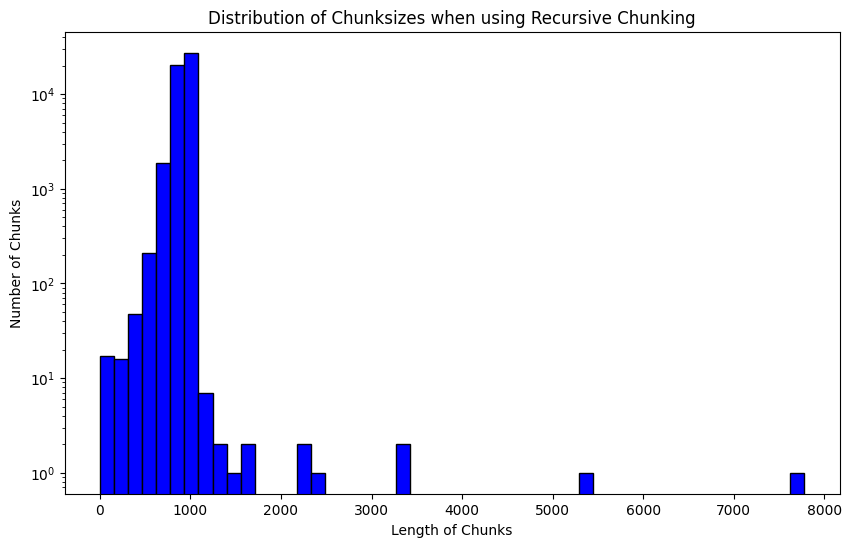

In [9]:
print('Number of Chunks: ', len(texts))

length_of_chunks = []
for doc in texts:
    length_of_chunks.append(len(doc.page_content))

length_of_chunks.sort(reverse=True)

print('Length of Chunks: ', length_of_chunks)

plt.figure(figsize=(10, 6))  
plt.hist(length_of_chunks, bins=50, color='blue', edgecolor='black')
plt.yscale('log')

plt.title('Distribution of Chunksizes when using Recursive Chunking')
plt.xlabel('Length of Chunks')
plt.ylabel('Number of Chunks')

plt.show()


Save Chunks into vectorstore

In [ ]:
embedding_function = OpenAIEmbeddings(model='text-embedding-3-small')

vectorstore_1000 = Chroma.from_documents(
    texts, 
    embedding_function,
    persist_directory='../vectorstores/recursive_size_1000'
)

In [7]:
import sys
import os

# Add the parent directory to the sys.path
sys.path.append(os.path.abspath(os.path.join('..')))

from rag import Rag
from evaluator import RagEvaluator

/home/dabr/code/langchain-rag-eval/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Evaluation with GPT-4o as Judge
- {'answer_relevancy': 0.6678, 'answer_correctness': 0.2087, 'context_recall': 0.306, 'context_relevancy': 0.1178}
- Time of Evaluation = 18:38 min
- Cost for evaluation = ~4$ 

In [2]:
recursive_1000_rag = Rag(chunkingstrategy='recursive_size_1000', llm='gpt-3.5-turbo-0125', embedding='text-embedding-3-small')
recursive_1000_eval = RagEvaluator(rag=recursive_1000_rag, eval_llm='gpt-4o', embedding_function='text-embedding-3-small')

passing column names as 'ground_truths' is deprecated and will be removed in the next version, please use 'ground_truth' instead. Note that `ground_truth` should be of type string and not Sequence[string] like `ground_truths`


Dataset({
    features: ['question', 'answer', 'contexts', 'ground_truths'],
    num_rows: 18
})


Evaluating: 100%|██████████| 72/72 [02:41<00:00,  2.24s/it]


Dataset({
    features: ['question', 'answer', 'contexts', 'ground_truths'],
    num_rows: 18
})


passing column names as 'ground_truths' is deprecated and will be removed in the next version, please use 'ground_truth' instead. Note that `ground_truth` should be of type string and not Sequence[string] like `ground_truths`
Evaluating: 100%|██████████| 72/72 [01:33<00:00,  1.30s/it]
passing column names as 'ground_truths' is deprecated and will be removed in the next version, please use 'ground_truth' instead. Note that `ground_truth` should be of type string and not Sequence[string] like `ground_truths`


Dataset({
    features: ['question', 'answer', 'contexts', 'ground_truths'],
    num_rows: 18
})


Evaluating: 100%|██████████| 72/72 [01:42<00:00,  1.42s/it]
passing column names as 'ground_truths' is deprecated and will be removed in the next version, please use 'ground_truth' instead. Note that `ground_truth` should be of type string and not Sequence[string] like `ground_truths`


Dataset({
    features: ['question', 'answer', 'contexts', 'ground_truths'],
    num_rows: 18
})


Evaluating: 100%|██████████| 72/72 [01:46<00:00,  1.48s/it]
passing column names as 'ground_truths' is deprecated and will be removed in the next version, please use 'ground_truth' instead. Note that `ground_truth` should be of type string and not Sequence[string] like `ground_truths`


Dataset({
    features: ['question', 'answer', 'contexts', 'ground_truths'],
    num_rows: 18
})


Evaluating: 100%|██████████| 72/72 [01:51<00:00,  1.55s/it]


In [ ]:
result = recursive_1000_eval.get_mean_result()
print(result)

### Evaluation with GPT-3.5-turbo as Judge 
- Result: {'answer_relevancy': 0.5402, 'answer_correctness': 0.3028, 'context_recall': 0.3995, 'context_relevancy': 0.0667}
- Time of Evaluation = 5:37 min
- Cost = 

In [13]:
recursive_1000_rag = Rag(chunkingstrategy='recursive_size_1000', llm='gpt-3.5-turbo-0125', embedding='text-embedding-3-small')
recursive_1000_eval = RagEvaluator(rag=recursive_1000_rag, eval_llm='gpt-3.5-turbo-0125', embedding_function='text-embedding-3-small')

passing column names as 'ground_truths' is deprecated and will be removed in the next version, please use 'ground_truth' instead. Note that `ground_truth` should be of type string and not Sequence[string] like `ground_truths`


ValueError: Dataset feature "contexts" should be of type Sequence[string], got <class 'datasets.features.features.Sequence'>

In [3]:
result = recursive_1000_eval.get_mean_result()
print(result)

{'answer_relevancy': 0.5402, 'answer_correctness': 0.3028, 'context_recall': 0.3995, 'context_relevancy': 0.0667}


### Create Chunks with chunksize = 1500 and chunkoverlap = 300

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(
    separators = [".", "\n", "\n\n"],
    chunk_size=1500,
    chunk_overlap=300,
    length_function=len,
    is_separator_regex=False
)

texts = text_splitter.create_documents([fiqa_corpus])

embedding_function = OpenAIEmbeddings(model='text-embedding-3-small')

vectorstore = Chroma.from_documents(
    texts, 
    embedding_function,
    persist_directory='../vectorstores/recursive_size_1500'
)

### Evaluation with GPT-3.5-turbo as Judge 
- {'answer_relevancy': 0.485, 'answer_correctness': 0.2885, 'context_recall': 0.3559, 'context_relevancy': 0.0759}

In [8]:
recursive_1500_rag = Rag(chunkingstrategy='recursive_size_1500', llm='gpt-3.5-turbo-0125', embedding='text-embedding-3-small')
recursive_1500_eval = RagEvaluator(rag=recursive_1500_rag, eval_llm='gpt-3.5-turbo-0125', embedding_function='text-embedding-3-small')

passing column names as 'ground_truths' is deprecated and will be removed in the next version, please use 'ground_truth' instead. Note that `ground_truth` should be of type string and not Sequence[string] like `ground_truths`
Evaluating: 100%|██████████| 72/72 [01:11<00:00,  1.00it/s]
passing column names as 'ground_truths' is deprecated and will be removed in the next version, please use 'ground_truth' instead. Note that `ground_truth` should be of type string and not Sequence[string] like `ground_truths`
Evaluating: 100%|██████████| 72/72 [01:59<00:00,  1.67s/it]
passing column names as 'ground_truths' is deprecated and will be removed in the next version, please use 'ground_truth' instead. Note that `ground_truth` should be of type string and not Sequence[string] like `ground_truths`
Evaluating: 100%|██████████| 72/72 [01:54<00:00,  1.59s/it]
passing column names as 'ground_truths' is deprecated and will be removed in the next version, please use 'ground_truth' instead. Note that `g

In [ ]:
result_of_1500 = recursive_1500_eval.get_mean_result()
print(result_of_1500)

### Chunk_size = 2000 & Chunk_overlap = 400

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(
    separators = [".", "\n", "\n\n"],
    chunk_size=2000,
    chunk_overlap=400,
    length_function=len,
    is_separator_regex=False
)

texts = text_splitter.create_documents([fiqa_corpus])

embedding_function = OpenAIEmbeddings(model='text-embedding-3-small')

vectorstore_2000 = Chroma.from_documents(
    texts, 
    embedding_function,
    persist_directory='../vectorstores/recursive_size_2000'
)

### Evaluation with GPT-3.5-turbo as Judge
- {'answer_relevancy': 0.4513, 'answer_correctness': 0.3229, 'context_recall': 0.3989, 'context_relevancy': 0.0573}

In [12]:
import sys
import os

# Add the parent directory to the sys.path
sys.path.append(os.path.abspath(os.path.join('..')))

from rag import Rag
from evaluator import RagEvaluator

In [2]:
recursive_2000_rag = Rag(chunkingstrategy='recursive_size_2000', llm='gpt-3.5-turbo-0125', embedding='text-embedding-3-small')
recursive_2000_eval = RagEvaluator(rag=recursive_2000_rag, eval_llm='gpt-3.5-turbo-0125', embedding_function='text-embedding-3-small')

['. Banks want to profit on the loans they make, like mortgage loans. To do so, they try to maximize the difference between the rates they charge on mortgages and other loans (revenue), and the rates they pay savings account holders, the Federal Reserve or other banks to obtain funds (expenses). This means that the rates they offer to pay are as close to these rates as possible. As the charts shows, both rates have been cut significantly since the start of the recession, either through open market operations (the federal funds rate) or directly (the discount rate). The discount rate is set directly by the regional Federal Reserve banks every 14 days.   In most cases, the federal funds rate is lower than the discount rate, in order to encourage banks to lend money to each other instead of borrowing it from the Fed. In the past, however, there have been rare instances where the federal funds rate has exceeded the discount rate, and it\'s been cheaper for banks to borrow money directly fr

passing column names as 'ground_truths' is deprecated and will be removed in the next version, please use 'ground_truth' instead. Note that `ground_truth` should be of type string and not Sequence[string] like `ground_truths`


[".com/blog/tax-self-employment-still-employed/ :  Broadly, you are likely to be running a business if you have a regular, organised activity with a profit motive, which continues for at least a few months. If the work is one-off, or very occasional (say, a few times per year), or not very organised, or of very low value (say, under £2,000 per year), then it might qualify as casual income. If you think it is beyond the definition of casual income then you would also need to pay National Insurance, as described in the previous link, but otherwise the tax treatment would be the same.\nAs a sole trader you would fill out an Individual Tax Return and complete the Business and Professional Items Section P1 to P19, then enter the amounts from that section into Item 15 in the Supplementary Section of the Tax Return. Any business income as a sole trader will be included into your taxable income for the year together with other sources of income you may have earned in the same income year. Whet

Evaluating: 100%|██████████| 72/72 [02:22<00:00,  1.98s/it]


['. Banks want to profit on the loans they make, like mortgage loans. To do so, they try to maximize the difference between the rates they charge on mortgages and other loans (revenue), and the rates they pay savings account holders, the Federal Reserve or other banks to obtain funds (expenses). This means that the rates they offer to pay are as close to these rates as possible. As the charts shows, both rates have been cut significantly since the start of the recession, either through open market operations (the federal funds rate) or directly (the discount rate). The discount rate is set directly by the regional Federal Reserve banks every 14 days.   In most cases, the federal funds rate is lower than the discount rate, in order to encourage banks to lend money to each other instead of borrowing it from the Fed. In the past, however, there have been rare instances where the federal funds rate has exceeded the discount rate, and it\'s been cheaper for banks to borrow money directly fr

passing column names as 'ground_truths' is deprecated and will be removed in the next version, please use 'ground_truth' instead. Note that `ground_truth` should be of type string and not Sequence[string] like `ground_truths`
Evaluating:  17%|█▋        | 12/72 [00:05<00:15,  3.99it/s]Task exception was never retrieved
future: <Task finished name='Task-293' coro=<AsyncClient.aclose() done, defined at /home/dabr/code/langchain-rag-eval/venv/lib/python3.10/site-packages/httpx/_client.py:2011> exception=RuntimeError('Event loop is closed')>
Traceback (most recent call last):
  File "/home/dabr/code/langchain-rag-eval/venv/lib/python3.10/site-packages/httpx/_client.py", line 2018, in aclose
    await self._transport.aclose()
  File "/home/dabr/code/langchain-rag-eval/venv/lib/python3.10/site-packages/httpx/_transports/default.py", line 385, in aclose
    await self._pool.aclose()
  File "/home/dabr/code/langchain-rag-eval/venv/lib/python3.10/site-packages/httpcore/_async/connection_pool.py"

['. Banks want to profit on the loans they make, like mortgage loans. To do so, they try to maximize the difference between the rates they charge on mortgages and other loans (revenue), and the rates they pay savings account holders, the Federal Reserve or other banks to obtain funds (expenses). This means that the rates they offer to pay are as close to these rates as possible. As the charts shows, both rates have been cut significantly since the start of the recession, either through open market operations (the federal funds rate) or directly (the discount rate). The discount rate is set directly by the regional Federal Reserve banks every 14 days.   In most cases, the federal funds rate is lower than the discount rate, in order to encourage banks to lend money to each other instead of borrowing it from the Fed. In the past, however, there have been rare instances where the federal funds rate has exceeded the discount rate, and it\'s been cheaper for banks to borrow money directly fr

passing column names as 'ground_truths' is deprecated and will be removed in the next version, please use 'ground_truth' instead. Note that `ground_truth` should be of type string and not Sequence[string] like `ground_truths`


[".com/blog/tax-self-employment-still-employed/ :  Broadly, you are likely to be running a business if you have a regular, organised activity with a profit motive, which continues for at least a few months. If the work is one-off, or very occasional (say, a few times per year), or not very organised, or of very low value (say, under £2,000 per year), then it might qualify as casual income. If you think it is beyond the definition of casual income then you would also need to pay National Insurance, as described in the previous link, but otherwise the tax treatment would be the same.\nAs a sole trader you would fill out an Individual Tax Return and complete the Business and Professional Items Section P1 to P19, then enter the amounts from that section into Item 15 in the Supplementary Section of the Tax Return. Any business income as a sole trader will be included into your taxable income for the year together with other sources of income you may have earned in the same income year. Whet

Evaluating: 100%|██████████| 72/72 [01:56<00:00,  1.62s/it]


['. Banks want to profit on the loans they make, like mortgage loans. To do so, they try to maximize the difference between the rates they charge on mortgages and other loans (revenue), and the rates they pay savings account holders, the Federal Reserve or other banks to obtain funds (expenses). This means that the rates they offer to pay are as close to these rates as possible. As the charts shows, both rates have been cut significantly since the start of the recession, either through open market operations (the federal funds rate) or directly (the discount rate). The discount rate is set directly by the regional Federal Reserve banks every 14 days.   In most cases, the federal funds rate is lower than the discount rate, in order to encourage banks to lend money to each other instead of borrowing it from the Fed. In the past, however, there have been rare instances where the federal funds rate has exceeded the discount rate, and it\'s been cheaper for banks to borrow money directly fr

passing column names as 'ground_truths' is deprecated and will be removed in the next version, please use 'ground_truth' instead. Note that `ground_truth` should be of type string and not Sequence[string] like `ground_truths`


[".com/blog/tax-self-employment-still-employed/ :  Broadly, you are likely to be running a business if you have a regular, organised activity with a profit motive, which continues for at least a few months. If the work is one-off, or very occasional (say, a few times per year), or not very organised, or of very low value (say, under £2,000 per year), then it might qualify as casual income. If you think it is beyond the definition of casual income then you would also need to pay National Insurance, as described in the previous link, but otherwise the tax treatment would be the same.\nAs a sole trader you would fill out an Individual Tax Return and complete the Business and Professional Items Section P1 to P19, then enter the amounts from that section into Item 15 in the Supplementary Section of the Tax Return. Any business income as a sole trader will be included into your taxable income for the year together with other sources of income you may have earned in the same income year. Whet

Evaluating: 100%|██████████| 72/72 [02:52<00:00,  2.39s/it]


['. Banks want to profit on the loans they make, like mortgage loans. To do so, they try to maximize the difference between the rates they charge on mortgages and other loans (revenue), and the rates they pay savings account holders, the Federal Reserve or other banks to obtain funds (expenses). This means that the rates they offer to pay are as close to these rates as possible. As the charts shows, both rates have been cut significantly since the start of the recession, either through open market operations (the federal funds rate) or directly (the discount rate). The discount rate is set directly by the regional Federal Reserve banks every 14 days.   In most cases, the federal funds rate is lower than the discount rate, in order to encourage banks to lend money to each other instead of borrowing it from the Fed. In the past, however, there have been rare instances where the federal funds rate has exceeded the discount rate, and it\'s been cheaper for banks to borrow money directly fr

passing column names as 'ground_truths' is deprecated and will be removed in the next version, please use 'ground_truth' instead. Note that `ground_truth` should be of type string and not Sequence[string] like `ground_truths`


[".com/blog/tax-self-employment-still-employed/ :  Broadly, you are likely to be running a business if you have a regular, organised activity with a profit motive, which continues for at least a few months. If the work is one-off, or very occasional (say, a few times per year), or not very organised, or of very low value (say, under £2,000 per year), then it might qualify as casual income. If you think it is beyond the definition of casual income then you would also need to pay National Insurance, as described in the previous link, but otherwise the tax treatment would be the same.\nAs a sole trader you would fill out an Individual Tax Return and complete the Business and Professional Items Section P1 to P19, then enter the amounts from that section into Item 15 in the Supplementary Section of the Tax Return. Any business income as a sole trader will be included into your taxable income for the year together with other sources of income you may have earned in the same income year. Whet

Evaluating: 100%|██████████| 72/72 [02:41<00:00,  2.24s/it]


In [3]:
result_of_2000 = recursive_2000_eval.get_mean_result()
print(result_of_2000)

{'answer_relevancy': 0.4513, 'answer_correctness': 0.3229, 'context_recall': 0.3989, 'context_relevancy': 0.0573}


Here I want to find out why I always get 0.0 context relevancy

In [3]:
set_1 = recursive_2000_eval.get_golden_dataset(1)
set_2 = recursive_2000_eval.get_golden_dataset(2)
set_3 = recursive_2000_eval.get_golden_dataset(3)

NameError: name 'recursive_2000_eval' is not defined